In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_openml

In [15]:
df = pd.read_csv("./50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
#right after loading the data we first check for missing values as it causes issues 

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [17]:
string_columns = df.select_dtypes(include='object')
print(string_columns.columns)

Index(['State'], dtype='object')


In [18]:
print(df.dtypes)
df = df.drop('State', axis=1)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


d:\Users\Hammas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


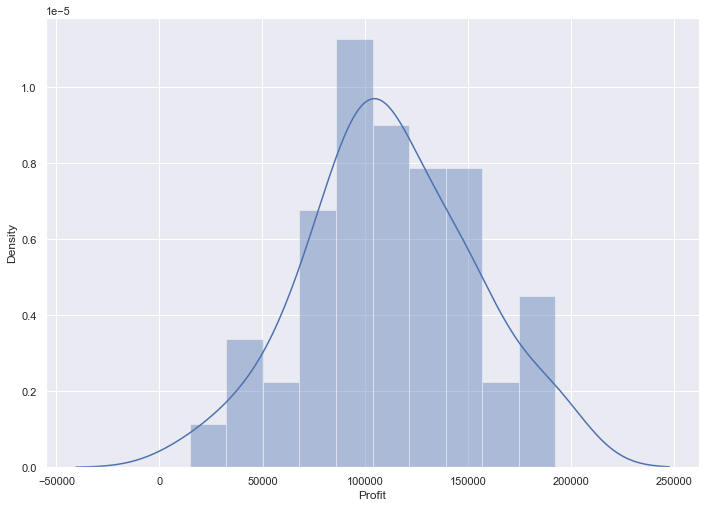

In [20]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Profit'], bins=10)
plt.show()

<AxesSubplot:>

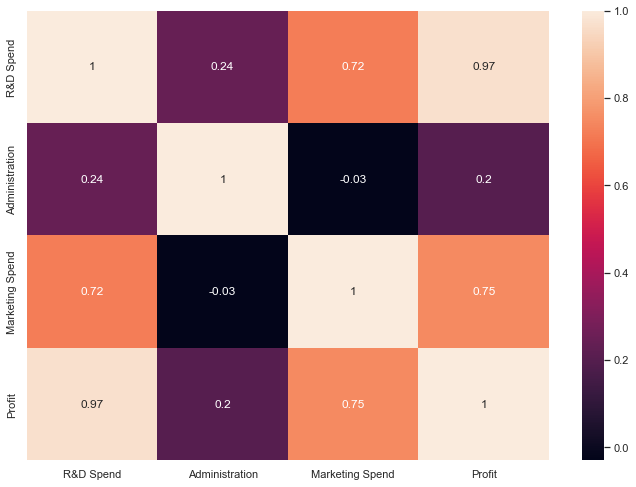

In [21]:
correlation_matrix = df.corr().round(2)
# print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#The correlation coefficient ranges from -1 to 1. 
#If the value is close to 1, it means that there is
#a strong positive correlation between the two variables. 
#When it is close to -1, the variables have a strong negative correlation.

#another thing to definitely check is multi-co-linearity
#https://stats.stackexchange.com/a/1150

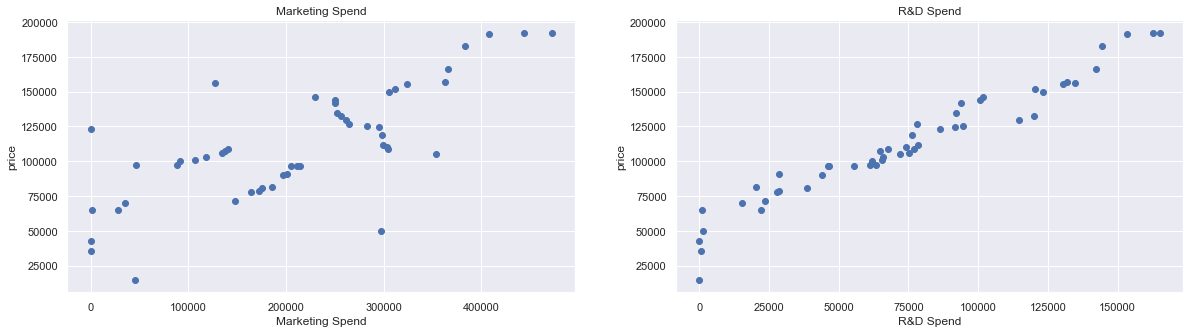

In [24]:

# OverallQual,YearRemodAdd

#lets plot these

plt.figure(figsize=(20, 5))

features = ['Marketing Spend','R&D Spend']
target = df['Profit']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

In [ ]:
#Task 2. find out why we dont use boston dataset. 
# Task 3. Find another dataset of your choice and replicate Linear Regression

In [ ]:
#housing_df.isna().values.any()
#housing_df.isnull().values.any()
#housing_df = housing_df.dropna()

In [27]:
#dividing into  X and Y

X = pd.DataFrame(np.c_[df['R&D Spend'], df['Marketing Spend']], columns = ['R&D Spend','Marketing Spend'])
y = df['Profit']

print(X.dtypes)
print(y.dtypes)

R&D Spend          float64
Marketing Spend    float64
dtype: object
float64


In [28]:
#dividing into test and train 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40, 2)
(10, 2)
(40,)
(10,)


In [29]:
#training and testing model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
testPred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 9358.583115148494
R2 score is 0.9436198878593198


The model performance for testing set
--------------------------------------
RMSE is 7073.857168705288
R2 score is 0.9683604384024199


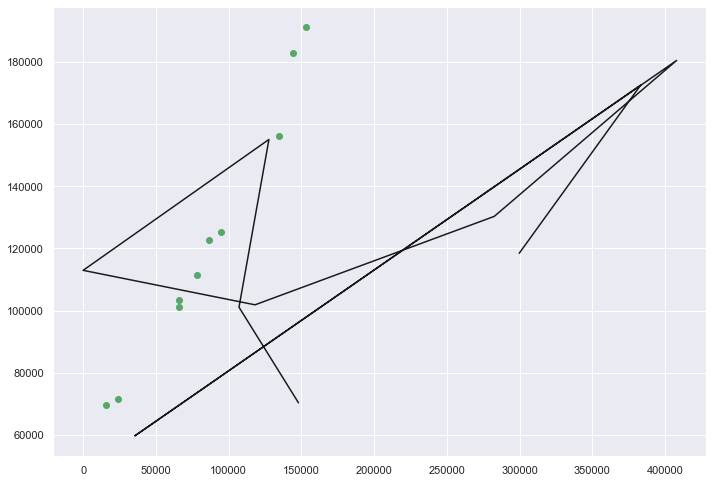

In [36]:
#plot to see
plt.scatter(X_test['R&D Spend'], Y_test,color='g') 
plt.plot(X_test['Marketing Spend'], y_test_predict,color='k') 
plt.show()

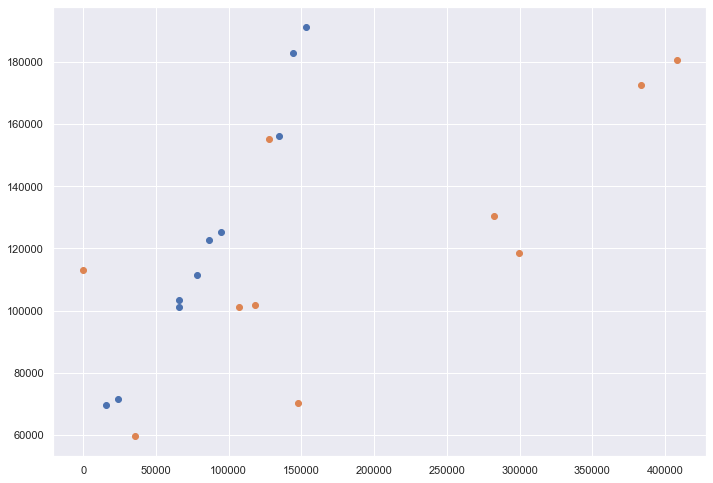

In [37]:
plt.scatter(X_test['R&D Spend'],Y_test)
plt.scatter(X_test['Marketing Spend'],y_test_predict)
plt.show()